# Object Detection and Tracking
Created by: Karan Shah


**Objective**: This Module is designed to teach physics undergraduate students the concepts of object detection and tracking using Python.

The module is divided into 3 parts:
1. Manipulating images
2. Manipulating videos and basic object tracking
3. Object detection and tracking using deep learning


# 1. Manipulating images with python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy as sp

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
# Helper functions

def get_pixels(image, gray=True):
    if gray:
        im = plt.imshow(image,
                        interpolation='none', vmin=0, vmax=1, aspect='equal', cmap='gray')
        n_y, n_x = image.shape
    else:
        im = plt.imshow(image,
                        interpolation='none', aspect='equal')
        n_y, n_x,_ = image.shape
    ax = plt.gca();

    

    ax.set_xticks(np.arange(0, n_x, 1))
    ax.set_yticks(np.arange(0, n_y, 1))

    ax.set_xticklabels(np.arange(0, n_x, 1))
    ax.set_yticklabels(np.arange(0, n_y, 1))

    ax.set_xticks(np.arange(-.5, n_x, 1), minor=True)
    ax.set_yticks(np.arange(-.5, n_y, 1), minor=True)

    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)

    ax.tick_params(which='minor', bottom=False, left=False)
    return ax

## 1. Introduction to Digital Images and Pixel Representation (What are images?)

Digital images are typically represented as arrays of pixels, where each pixel corresponds to a specific location in the image and stores color information. In this section, we will explore how digital images are represented as arrays of pixels and how to manipulate them using Python.

### Simplest example: Binary image

A binary image is simply a 2D array of 1s and 0s. Here 1s denote the color white (pixel on) and 0s denote the color black (pixel off). Let us design our first pixel art:

In [3]:
image = np.asarray([[1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.]])

Can you guess what the image is from its underlying array? We can use the `matplotlib.imshow(image_array)` function to visualize this array. We can also use the helper function `get_pixels(image_array)` to visualize our pixel art.

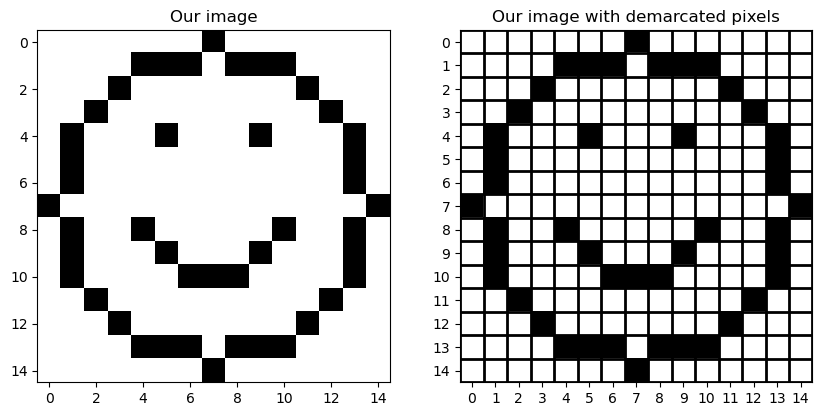

image.shape=(15, 15)


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 


ax1.imshow(image,cmap='gray')
ax1.set_title('Our image')

# Plot data on the second subplot
ax2 = get_pixels(image)
ax2.set_title('Our image with demarcated pixels')

# plt.tight_layout()  # adjusts subplot params so that subplots are nicely fit in the figure
plt.show()

print(f"{image.shape=}")

It is an array of size $15 \times 15$, consisting of 1s and 0s. Notice the indexing. It is slightly different from our $x$,$y$ cartesian coordinates, where the origin is at the bottom-left corner for when the axes are non-negative. In this notebook we use $i$ to denote the row index and $j$ to denote the column index, with origin at top-left corner. 

Let us recreate this image programatically. We first begin with a blank canvas, which is just an array of 1s (for white).

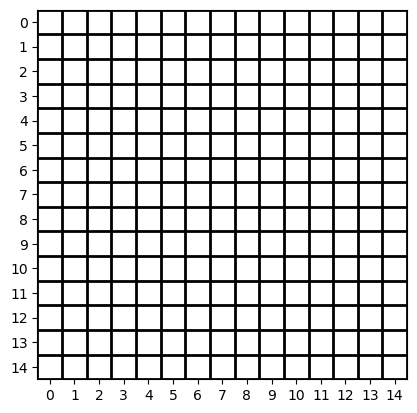

In [5]:
image = np.ones((15, 15))

ax = get_pixels(image)
plt.show()

Here is some code to add the circle outline representing the face.

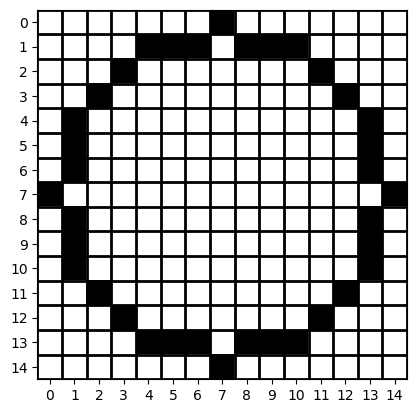

In [6]:
center = (7, 7)
radius = 7
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (i-center[0])**2 + (j-center[1])**2 <= radius**2:
            if (i-center[0])**2 + (j-center[1])**2 > (radius-1)**2:
                image[i, j] = 0

ax = get_pixels(image)
plt.show()

Now use indexing to fill the eyes and the smile:

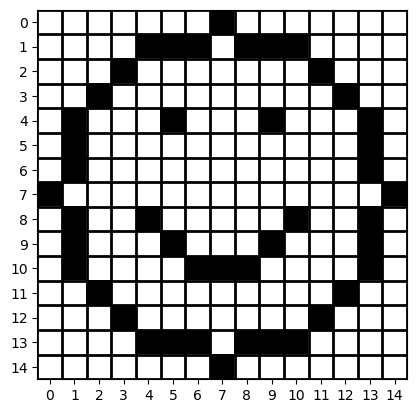

In [7]:

# Define the positions of the eyes and the smile
eye1 = (4, 5)
eye2 = (4, 9)


# Set these positions to 0 (black)
image[eye1] = 0
image[eye2] = 0

image[(10,7)] = 0
for i in range(1,4):
    image[(10-i+1, 7-i)] = 0
    image[(10-i+1, 7+i)] = 0


# Display the image
ax = get_pixels(image)
plt.show()

Now you have an idea of how images can be represented using binary arrays. Let's move on from pixel art to "real" images.

###  Grayscale Images

Grayscale images can be represented as 2D arrays, where each element (pixel) of the array corresponds to a single intensity integer value ranging from 0 (black) to 255 (white).

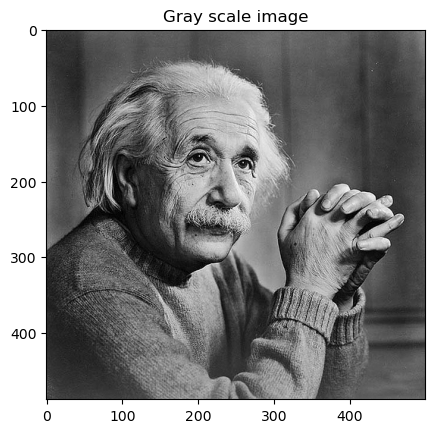

In [8]:
bw_image = cv2.imread('images/einstein.jpg', cv2.IMREAD_GRAYSCALE)

plt.title("Gray scale image")
plt.imshow(bw_image, cmap='gray')
plt.show()

Let's look into the image array further.

In [9]:
print(f"{bw_image.shape=}")
print(f"{bw_image.dtype=}")
print(f"{bw_image.max()=}")
print(f"{bw_image.min()=}")

bw_image.shape=(488, 500)
bw_image.dtype=dtype('uint8')
bw_image.max()=255
bw_image.min()=0


### Color images
Color images are represented as 3D arrays, where each element (pixel) of the array contains three values (channels) corresponding to the red, green, and blue (RGB) intensities. Each channel's intensity value ranges from 0 to 255.


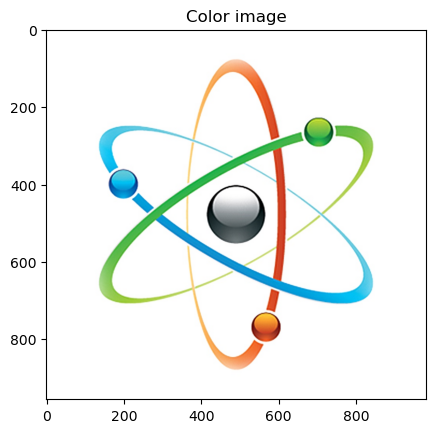

color_image.shape=(956, 981, 3)


In [10]:
color_image = cv2.imread("images/color_test.jpg")
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.title("Color image")
plt.imshow(color_image)
plt.show()

print(f"{color_image.shape=}")

In [11]:
print(f"{color_image.shape=}")
print(f"{color_image.dtype=}")
print(f"{color_image.max()=}")
print(f"{color_image.min()=}")

color_image.shape=(956, 981, 3)
color_image.dtype=dtype('uint8')
color_image.max()=255
color_image.min()=0


Here the image consists of 3 2D arrays of size $956\times981$, where each 2D array consists of `int` values between 0 and 255, representing color channels Red, Green and Blue.

### Manipulating images
Since images are stored as numpy arrays, we can perform basic manipulations using array operations. In the next cell, implement some basic operations as described in the comments.

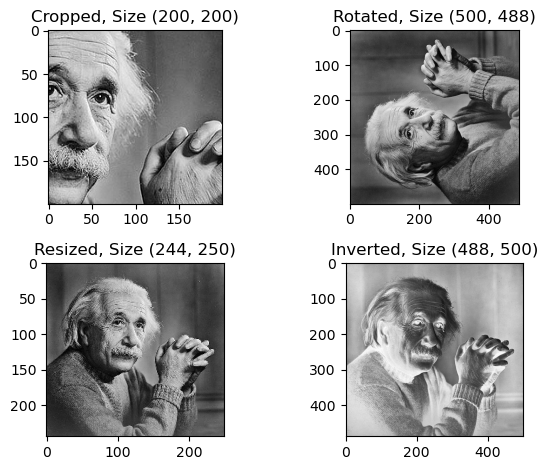

In [12]:
bw_image = cv2.imread('images/einstein.jpg', cv2.IMREAD_GRAYSCALE)
# Cropping
cropped_image = bw_image[100:300, 200:400]


# Rotation (90 degrees)
rotated_image = np.rot90(bw_image)

# Resize
resized_image = bw_image[::2, ::2]

# Invert
inverted_image = np.abs(255 - bw_image)


titles = ["Cropped", "Rotated", "Resized", "Inverted"]
images = [cropped_image, rotated_image, resized_image, inverted_image]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(f"{titles[i]}, Size {images[i].shape}")
plt.tight_layout()
plt.show()

We can also manipulate colors by indexing the appropriate channel. Here is Mario:

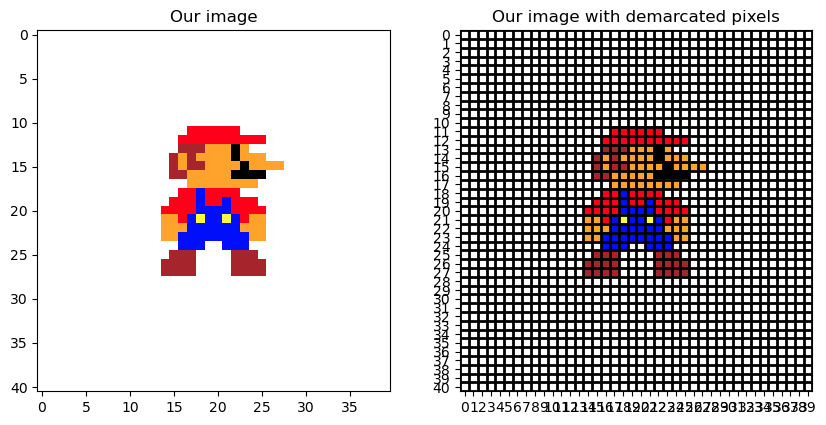

mario_image.shape=(41, 40, 3)


In [13]:
mario_image = cv2.imread('images/mario.png')
mario_image = cv2.cvtColor(mario_image, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.imshow(mario_image)
ax1.set_title('Our image')
ax2 = get_pixels(mario_image, gray=False)
ax2.set_title('Our image with demarcated pixels')
plt.show()

print(f"{mario_image.shape=}")

We want to make him look a little bit like Luigi. Let's change the color of his shirt and hat.
Let's look at the value for red from Mario's hat (eg pixel (2,6)).

In [14]:
hat_pixel = (11,18)

mario_red = mario_image[hat_pixel][:]
print(f"{mario_red=}")

mario_red=array([255,   0,  27], dtype=uint8)


We know that Luigi green is [96, 196, 69]. We want to convert all pixels that are mario_red to luigi_green.

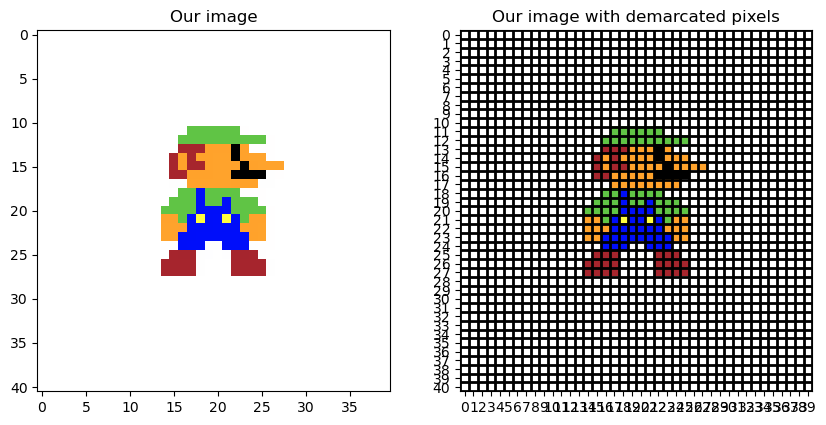

luigi_image.shape=(41, 40, 3)


In [15]:
luigi_green = [96, 196, 69]


luigi_image = mario_image

r_mask = mario_image[:,:,0] == mario_red[0]
g_mask = mario_image[:,:,1] == mario_red[1]
b_mask = mario_image[:,:,2] == mario_red[2]
combined_mask = r_mask & g_mask & b_mask
luigi_image[combined_mask] = luigi_green

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.imshow(luigi_image)
ax1.set_title('Our image')
ax2 = get_pixels(luigi_image, gray=False)
ax2.set_title('Our image with demarcated pixels')
plt.show()

print(f"{luigi_image.shape=}")

## 2. Image Processing using Linear Algebra Operations

In this section, we will explore how basic image processing operations can be performed using linear algebra operations with NumPy. Many image processing operations are done using convolution on 2D array images.




### 2.1. Grayscale Conversion

Grayscale conversion can be performed by calculating the weighted average of the RGB channels.

Mathematically, the grayscale conversion is done using the following equation:

$$
I_{gray} = 0.299 \times R + 0.587 \times G + 0.114 \times B
$$

where $I_{gray}$ is the grayscale intensity, and $R$, $G$, and $B$ are the red, green, and blue channel intensities, respectively. The specific coeffiecients are estimated using colorimetry.



Size of color image: (15, 15)
Size of grayscale image: (956, 981)


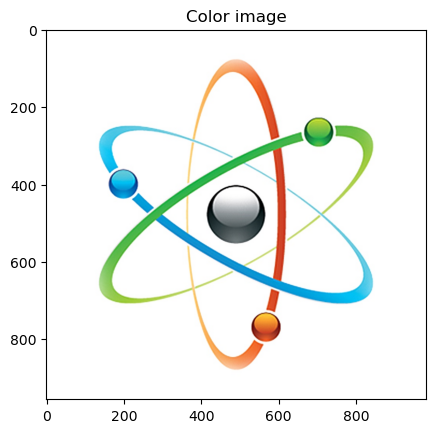

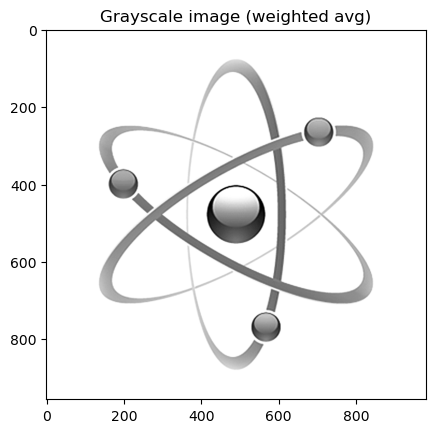

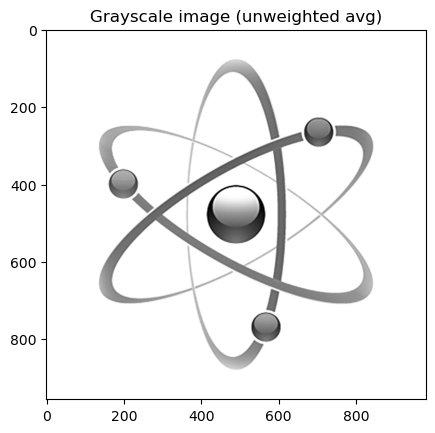

In [16]:
def convert_to_grayscale(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

color_image = cv2.imread("images/color_test.jpg")
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

gray_image = convert_to_grayscale(color_image)
avg_gray_image = np.mean(color_image,axis=2)

print(f"Size of color image: {image.shape}")
print(f"Size of grayscale image: {gray_image.shape}")

plt.title("Color image")
plt.imshow(color_image)
plt.show()
plt.title("Grayscale image (weighted avg)")
plt.imshow(gray_image, cmap="gray")
plt.show()
plt.title("Grayscale image (unweighted avg)")
plt.imshow(avg_gray_image, cmap="gray")
plt.show()



---

Now let's focus on kernel based operations.
<img src="./images/2D_Convolution_Animation.gif">
We define a kernel $K$ and convolve it with the image to get the desired effect $G$.
$$
G = I * K
$$

In the next sections, we will look at some of the most common kernels.


### 2.2. Edge Detection 
An edge can be thought of as an area of rapid change in image intensity.

![Fig Edge detection](./images/edge_detection.png)

To get the edges, we need to get the gradient of an image $$\nabla f=\left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right]$$

This can be using the Sobel operator, which is a discrete differentiation operator that calculates the gradient of the image intensity.



Mathematically, the Sobel operator calculates the gradient in the $x$ and $y$ directions using the following convolution kernels:

$$
S_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}, \quad
S_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

The gradients in the $x$ and $y$ directions, $G_x$ and $G_y$, are obtained by convolving the image $I$ with the Sobel kernels $S_x$ and $S_y$, respectively:

$$
G_x = I * S_x, \quad
G_y = I * S_y
$$

The magnitude of the gradient at each pixel is calculated as:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Edges can be detected by thresholding the gradient magnitude:

$$
E(x, y) = \begin{cases}
255 & \text{if } G(x, y) \geq T_{low} \text{ and } G(x, y) \leq T_{high} \\
0 & \text{otherwise}
\end{cases}
$$

where $E(x, y)$ is the edge image, and $T_{low}$ and $T_{high}$ are the lower and upper thresholds, respectively.


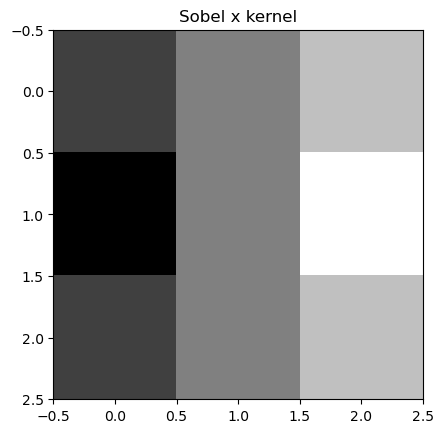

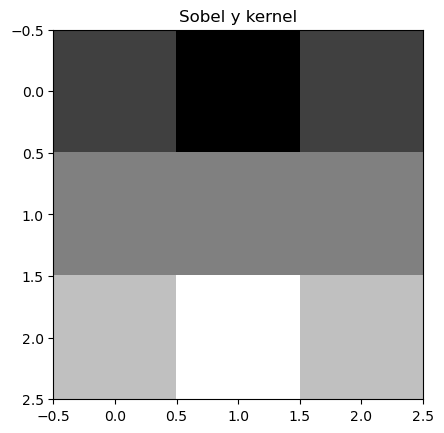

In [17]:
sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

plt.title('Sobel x kernel')
plt.imshow(sobel_x, cmap='gray')
plt.show()

plt.title('Sobel y kernel')
plt.imshow(sobel_y, cmap='gray')
plt.show()

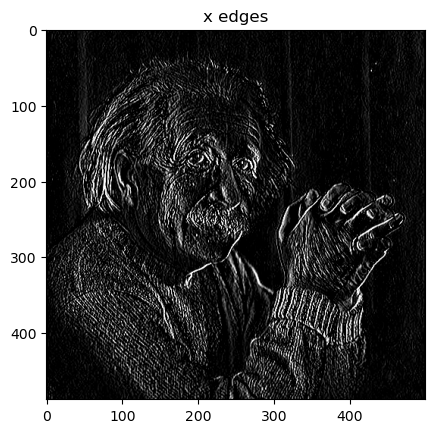

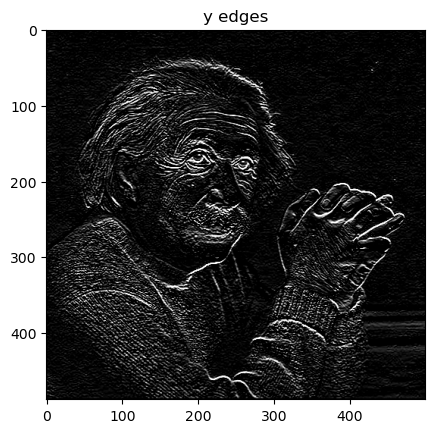

In [18]:
image = cv2.imread('images/einstein.jpg', cv2.IMREAD_GRAYSCALE)

def rescale(arr):
    arr = arr - arr.min()
    arr = arr/arr.max() * 255
    return arr.astype(int)


def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    grad_x = cv2.filter2D(image, -1, sobel_x)
    grad_y = cv2.filter2D(image, -1, sobel_y)
    
    grad_x = rescale(grad_x)
    grad_y = rescale(grad_y)
    return grad_x, grad_y


grad_x, grad_y = sobel_operator(image)

plt.title("x edges")
plt.imshow(grad_x, cmap="gray")
plt.show()

plt.title("y edges")
plt.imshow(grad_y, cmap="gray")
plt.show()




We can now find the gradient magnitude for this image.

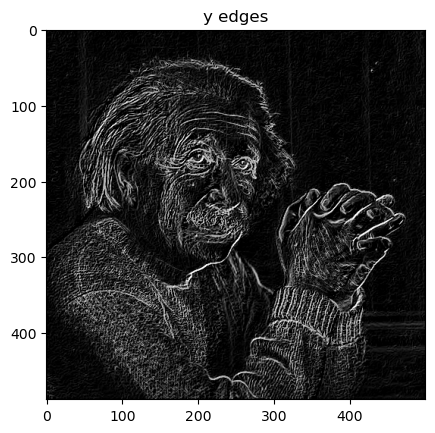

In [19]:
grad_mag = rescale(np.sqrt(grad_x**2 + grad_y**2))
plt.title("y edges")
plt.imshow(grad_mag, cmap="gray")
plt.show()

Play around with the threshold values to get good edge detection.

In [20]:
@interact(low_threshold=widgets.IntSlider(min=0, max=255, step=1, value=45), high_threshold=widgets.IntSlider(min=0, max=255, step=1, value=255))
def detect_edges(low_threshold=45, high_threshold=255, ret = False):
    edges = grad_mag
    edges = np.where((grad_mag < low_threshold) & (edges > high_threshold), image, 255).astype(np.uint8)
    edges = np.where((grad_mag >= low_threshold) & (edges <= high_threshold), image, 0).astype(np.uint8)
    
    plt.imshow(edges, cmap="gray")
    plt.show()
    
    if ret:
        return edges



interactive(children=(IntSlider(value=45, description='low_threshold', max=255), IntSlider(value=255, descript…

In practice, it is difficult to adjust and find the correct threshold values. We use the built in operations from opencv to get better edge detection.

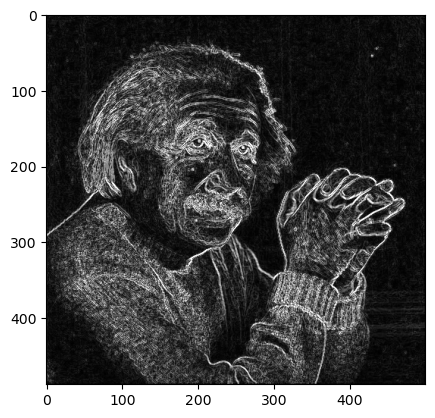

In [21]:
ddept=cv2.CV_16S
x = cv2.Sobel(image, ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(image, ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
plt.imshow(edge, cmap='gray')

### 2.3. Image Blurring 

Image blurring (also known as smoothing) is  performed by convolving the image with a low-pass filter kernel. It helps in removing noise and reducing the amount of detail in an image.

One common method for blurring images is using a Gaussian blur, which uses a Gaussian function as its convolution kernel.

Mathematically, the 2D Gaussian function is given by:

$$
G(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

where $\sigma$ is the standard deviation of the Gaussian distribution.



In [22]:
@interact(kernel_size=widgets.IntSlider(min=5, max=50, step=1, value=20), sigma=widgets.IntSlider(min=0.5, max=10.0, step=0.5, value=5))
def gaussian_blur(kernel_size=20, sigma=5, ret = False):

    ax = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))


    kernel = kernel / np.sum(kernel)
    blurred_image = cv2.filter2D(image, -1, kernel)
    
    if not ret:
        plt.title("Kernel")
        plt.imshow(kernel)
        plt.show()

        plt.title("Blurred image")
        plt.imshow(blurred_image, cmap="gray")
        plt.show()
    
    if ret:
        return blurred_image

# # blurred_image = gaussian_blur(image)
# plt.imshow(blurred_image, cmap="gray")
# plt.show()

interactive(children=(IntSlider(value=20, description='kernel_size', max=50, min=5), IntSlider(value=5, descri…

### 2.4. Image Sharpening
Image sharpening is performed by subtracting a blurred version of the image from the original image. This enhances the edges and increases the contrast of the image.

Mathematically, the sharpening operation can be represented as:

$$
I_{sharp} = I_{orig} + k \cdot (I_{orig} - I_{blur})
$$

where $I_{sharp}$ is the sharpened image, $I_{orig}$ is the original image, $I_{blur}$ is the blurred image, and $k$ is the sharpening factor.


In [23]:
blurred_image = gaussian_blur(5,3,True)

@interact(factor=widgets.IntSlider(min=0, max=10, step=1, value=1))
def sharpen_image(factor=1.0):
    sharpened_image = cv2.addWeighted(image, 1.0 + factor, blurred_image, -factor, 0)

    plt.title("Normal image")
    plt.imshow(image, cmap="gray")
    plt.show()
    
    plt.title("Blurred image")
    plt.imshow(blurred_image, cmap="gray")
    plt.show()
    
    plt.title("Sharpened image")
    plt.imshow(sharpened_image, cmap="gray")
    plt.show()

# sharpened_image = sharpen_image(image)
# plt.imshow(sharpened_image, cmap="gray")
# plt.show()


interactive(children=(IntSlider(value=1, description='factor', max=10), Output()), _dom_classes=('widget-inter…

## Conclusion

We have implemented some image operations and now have a good grasp on manipulating images. Now we use these techniques to track an object in a video, which is just a series of images. This is our segue to the next notebook.

## Mini-project


Fourier Transform on Images 

The Fourier Transform is a mathematical technique that transforms a function of time (or space) into a function of frequency. In the context of images, it can be used to analyze the frequency components.

The 2D Fourier Transform of an image can be calculated using the `numpy.fft.fft2` function.



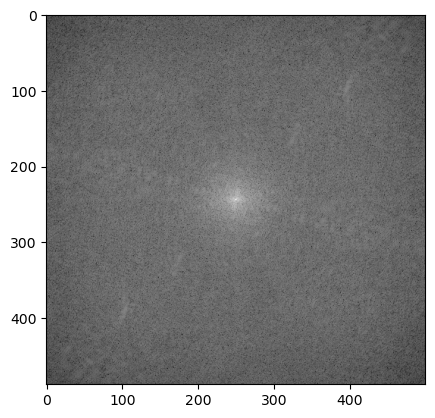

In [24]:
def fourier_transform(image):
    f = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f)
    return 20 * np.log(np.abs(f_shift))

f_transform = fourier_transform(image)
plt.imshow(f_transform, cmap="gray")
plt.show()


### Generating hybrid images

Hybrid images are a type of optical illusion, where the image looks different when looked from a small distance and when looked from a farther distance. 

This is created by combining the low frequency components of image1 and the high frequency components of image2.

There are multiple ways to do this:

1) Use gaussian blur to get the low frequency components of image1 and image2, and subtract out the low frequency components from image2. Now combine the low frequency components of image1 and high frequency components of image2.

2) Use fft and separate out the components in Fourier space.

<img src="./images/fourier_illusion.jpg">

You can read more about hybrid images here: 
1. https://en.wikipedia.org/wiki/Hybrid_image
2. http://olivalab.mit.edu/Papers/Oliva-Schyns_Hybrid-Image-Illusion-Chapter.pdf

Given the operations you have learnt by now, implement a simple hybrid image generator. You can find some example images to experiment on in the `data/hybrid` directory. Feel free to use your favourite search engine to learn more about hybrid images.

close_image.shape=(265, 225)


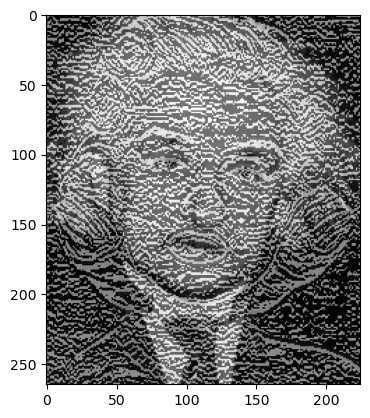

In [26]:


# Load the two images
close_image = cv2.imread('images/hybrid/einstein.bmp', cv2.IMREAD_GRAYSCALE)
far_image = cv2.imread('images/hybrid/marilyn.bmp', cv2.IMREAD_GRAYSCALE)

# Check if images are of same size
if close_image.shape != far_image.shape:
    print("Images are not of the same size!")
    exit(1)

# Compute the size of the images
n,m = close_image.shape
print(f"{close_image.shape=}")
# Create a Gaussian kernel for the low-pass and high-pass filters
low_pass = cv2.getGaussianKernel(50, 1)
high_pass = cv2.getGaussianKernel(5, 100)

# Compute the low-frequency map of the close-up image
low_close_image = cv2.filter2D(close_image, -1, low_pass)

# Compute the high-frequency map of the far-away image
high_far_image = far_image - cv2.filter2D(far_image, -1, high_pass)

# Combine the high-frequency and low-frequency maps
hybrid_image = cv2.addWeighted(low_close_image, 0.5, high_far_image, 0.5, 0)

# Save the output
cv2.imwrite('data/hybrid_image.jpg', hybrid_image)

# # Display the image
# cv2.imshow('Hybrid Image', hybrid_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(hybrid_image, cmap='gray')